In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('log.csv')

df

,millis,lat,lon,sat,alt,data,hora,altp,p,ax,ay,az,gx,gy,gz,pqd,rssi
0,10662.457746,-22.592844,-42.765008,8.335491,861.904586,2025/5/15,12:6:9,0.000000,926.422438,-1.124640,-1.636623,9.169374,0.439619,0.301905,1.177193,0.827199,-66.749657
1,10232.896759,-22.595554,-42.765081,5.946181,861.759456,2025/5/15,12:6:9,39.995919,928.234193,0.110603,-0.000228,9.456276,0.317809,-0.961584,-0.596422,-0.612179,-67.226096
2,10726.038974,-22.593525,-42.764993,8.433607,860.884352,2025/5/15,12:6:9,79.175594,925.654164,0.518524,-0.673068,8.916450,1.057168,0.149067,-2.512902,1.003459,-67.024532
3,10061.425921,-22.594487,-42.765056,8.260962,862.739311,2025/5/15,12:6:9,117.539027,926.270060,-0.921249,-0.734457,8.765064,0.285776,-0.683770,-1.082757,-0.406669,-66.437690
4,10678.373387,-22.592242,-42.765018,8.578062,862.314677,2025/5/15,12:6:9,155.086216,927.672993,0.220430,0.159424,8.963685,0.229372,0.203614,1.339798,-0.167000,-68.493234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10792.932280,-22.591572,-42.765018,7.216894,861.542267,2025/5/15,12:6:9,155.086216,927.757297,-1.193328,0.063704,10.545926,-0.154783,0.013627,-1.957646,0.156529,-68.258174
96,9626.817796,-22.594244,-42.764872,8.524734,861.319384,2025/5/15,12:6:9,117.539027,927.065396,1.239472,0.507943,8.198227,0.810180,-1.224059,1.000000,1.000000,-68.961805
97,10497.150298,-22.590846,-42.765025,9.035049,861.988718,2025/5/15,12:6:9,79.175594,929.210302,-0.212165,-1.610336,9.855052,-1.076789,-0.195878,1.259979,0.428210,-67.102461
98,10097.764661,-22.591532,-42.765061,9.167042,861.728736,2025/5/15,12:6:9,39.995919,928.076400,-0.077121,-0.003369,8.885120,0.070460,-1.565955,1.114234,0.078616,-65.505678


In [82]:
# reorganiza para que o df fique em ordem crescente dos valores da coluna 'millis'
df = df.sort_values(by='millis').reset_index(drop=True)
for i in range(len(df)):
    # Cria uma parábola com máximo em 500 entre o ponto i inicial e i final
    n = len(df)
    a = -500 / ((n // 2) ** 2)
    df['altp'] = a * (df.index - n // 2) ** 2 + 500

In [83]:
tempo_ativo = df['millis'].iloc[-1] - df['millis'].iloc[0]
tempo_ativo = tempo_ativo / 60000 # Tempo ativo em minutos

print(f'Tempo ativo: {tempo_ativo:.2f} minutos')

Tempo ativo: 0.03 minutos


In [84]:
# threshold = df['altp'].mean()
threshold = 0
df_filtered = df[df['altp'] > threshold]

print(f'Threshold: {threshold:.2f} m')

Threshold: 0.00 m


In [85]:
tempo_ativo = df_filtered['millis'].iloc[-1] - df_filtered['millis'].iloc[0]
tempo_ativo = tempo_ativo / 60000 # Tempo ativo em minutos

print(f'Tempo ativo: {tempo_ativo:.2f} minutos')

Tempo ativo: 0.02 minutos


In [86]:
alt_max_gps = df_filtered['alt'].max()
alt_max = df_filtered['altp'].max()

print(f'Altura máxima GPS: {alt_max_gps:.2f} m')
print(f'Altura máxima barométrica: {alt_max:.2f} m')

Altura máxima GPS: 864.01 m
Altura máxima barométrica: 500.00 m


In [87]:
pqd_index = df_filtered[df['pqd'] == 1].index[0]
pqd_alt = df_filtered['altp'].iloc[pqd_index]

print(f'Paraquedas aberto: {pqd_alt:.2f} m')

Paraquedas aberto: 39.20 m


/tmp/ipykernel_52133/2614151653.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pqd_index = df_filtered[df['pqd'] == 1].index[0]


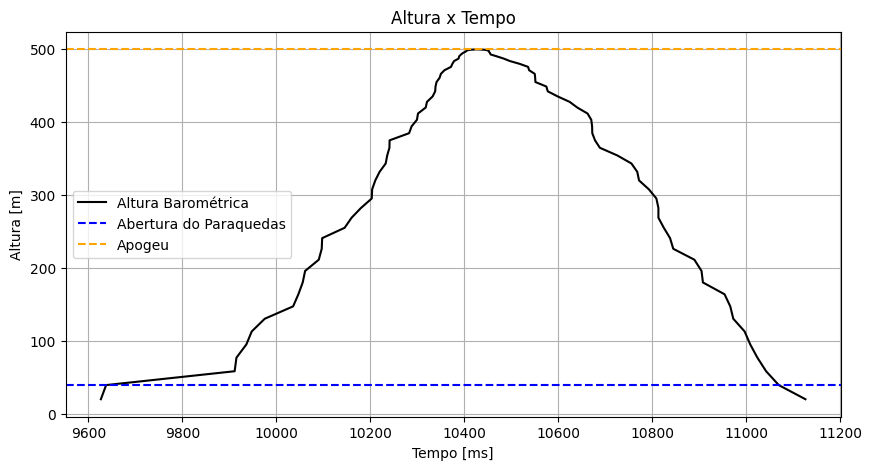

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['millis'], df_filtered['altp'], label='Altura Barométrica', color='black')
plt.axhline(y=pqd_alt, color='blue', linestyle='--', label='Abertura do Paraquedas')
plt.axhline(y=alt_max, color='orange', linestyle='--', label='Apogeu')
plt.title('Altura x Tempo')
plt.xlabel('Tempo [ms]')
plt.ylabel('Altura [m]')
plt.legend()
plt.grid()